In [ ]:
n=7
mask_box = np.ones((n,n),np.float32)/(n*n)
mask_cross = np.zeros((n,n),np.float32)
mask_cross[n//2,:] = 1
mask_cross[:,n//2] = 1
mask_cross = mask_cross/(n+(n-1))

plt.figure

In [ ]:
dst_box = cv.filter2D(img1,-1,mask_box)
dst_cross = cv.filter2D(img1,-1,mask_cross)
plt.figure(1)
fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img1,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(dst_box,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(dst_cross,cmap="gray",vmin=0,vmax=255)


In [ ]:
dst = cv.GaussianBlur(img1, (11,11),9)
plt.imshow(dst,cmap="gray",vmin=0,vmax=255)
plt.show()

In [ ]:
img_med = cv.medianBlur(img1,5)

fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img1,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(img_med,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(dst,cmap="gray",vmin=0,vmax=255)
plt.show()


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
img1 = cv.imread('imagenes/huang1.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('imagenes/huang2.jpg',cv.IMREAD_GRAYSCALE)
img3 = cv.imread('imagenes/huang3.jpg',cv.IMREAD_GRAYSCALE)

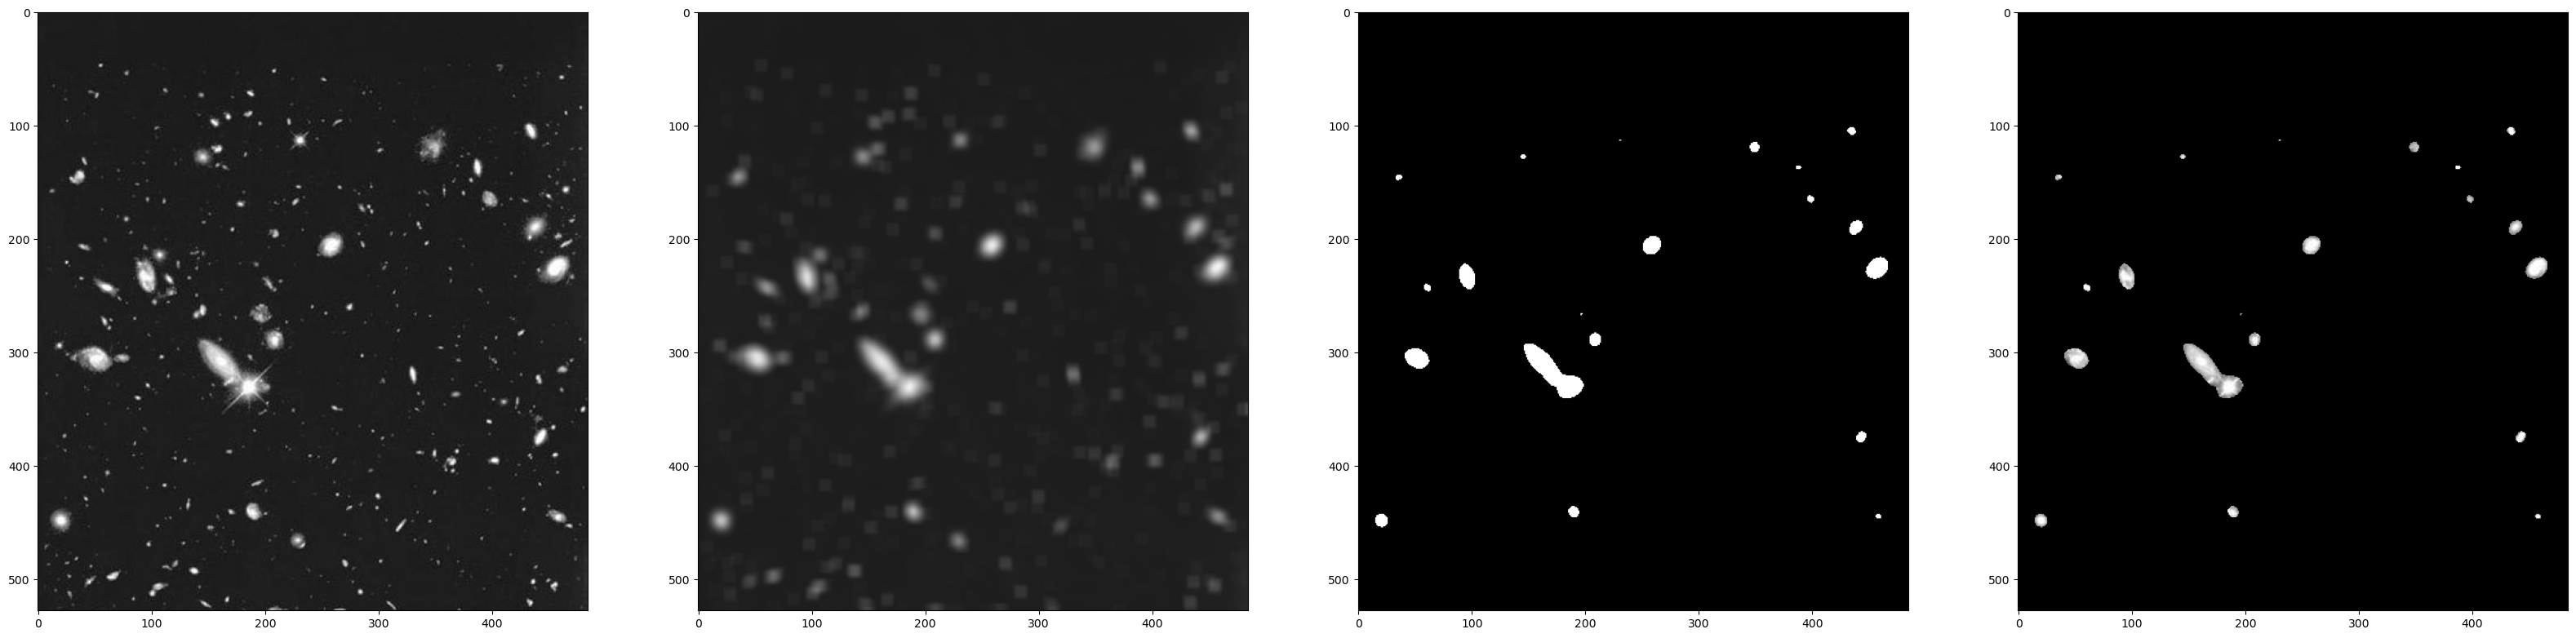

In [28]:
hubble = cv.imread("imagenes/hubble.tif",cv.IMREAD_GRAYSCALE)
hubble_filter = cv.boxFilter(hubble,-1,(11,11))
hubble_binary = cv.threshold(hubble_filter,127,255,cv.THRESH_BINARY)[1]
hubble_b2 = np.where(hubble_binary==255,1,0)

fig,ax = plt.subplots(1,4,figsize=(40,40))
ax[0].imshow(hubble,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(hubble_filter,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(hubble_binary,cmap="gray",vmin=0,vmax=255)
ax[3].imshow(hubble_b2*hubble,cmap="gray",vmin=0,vmax=255)
plt.show()



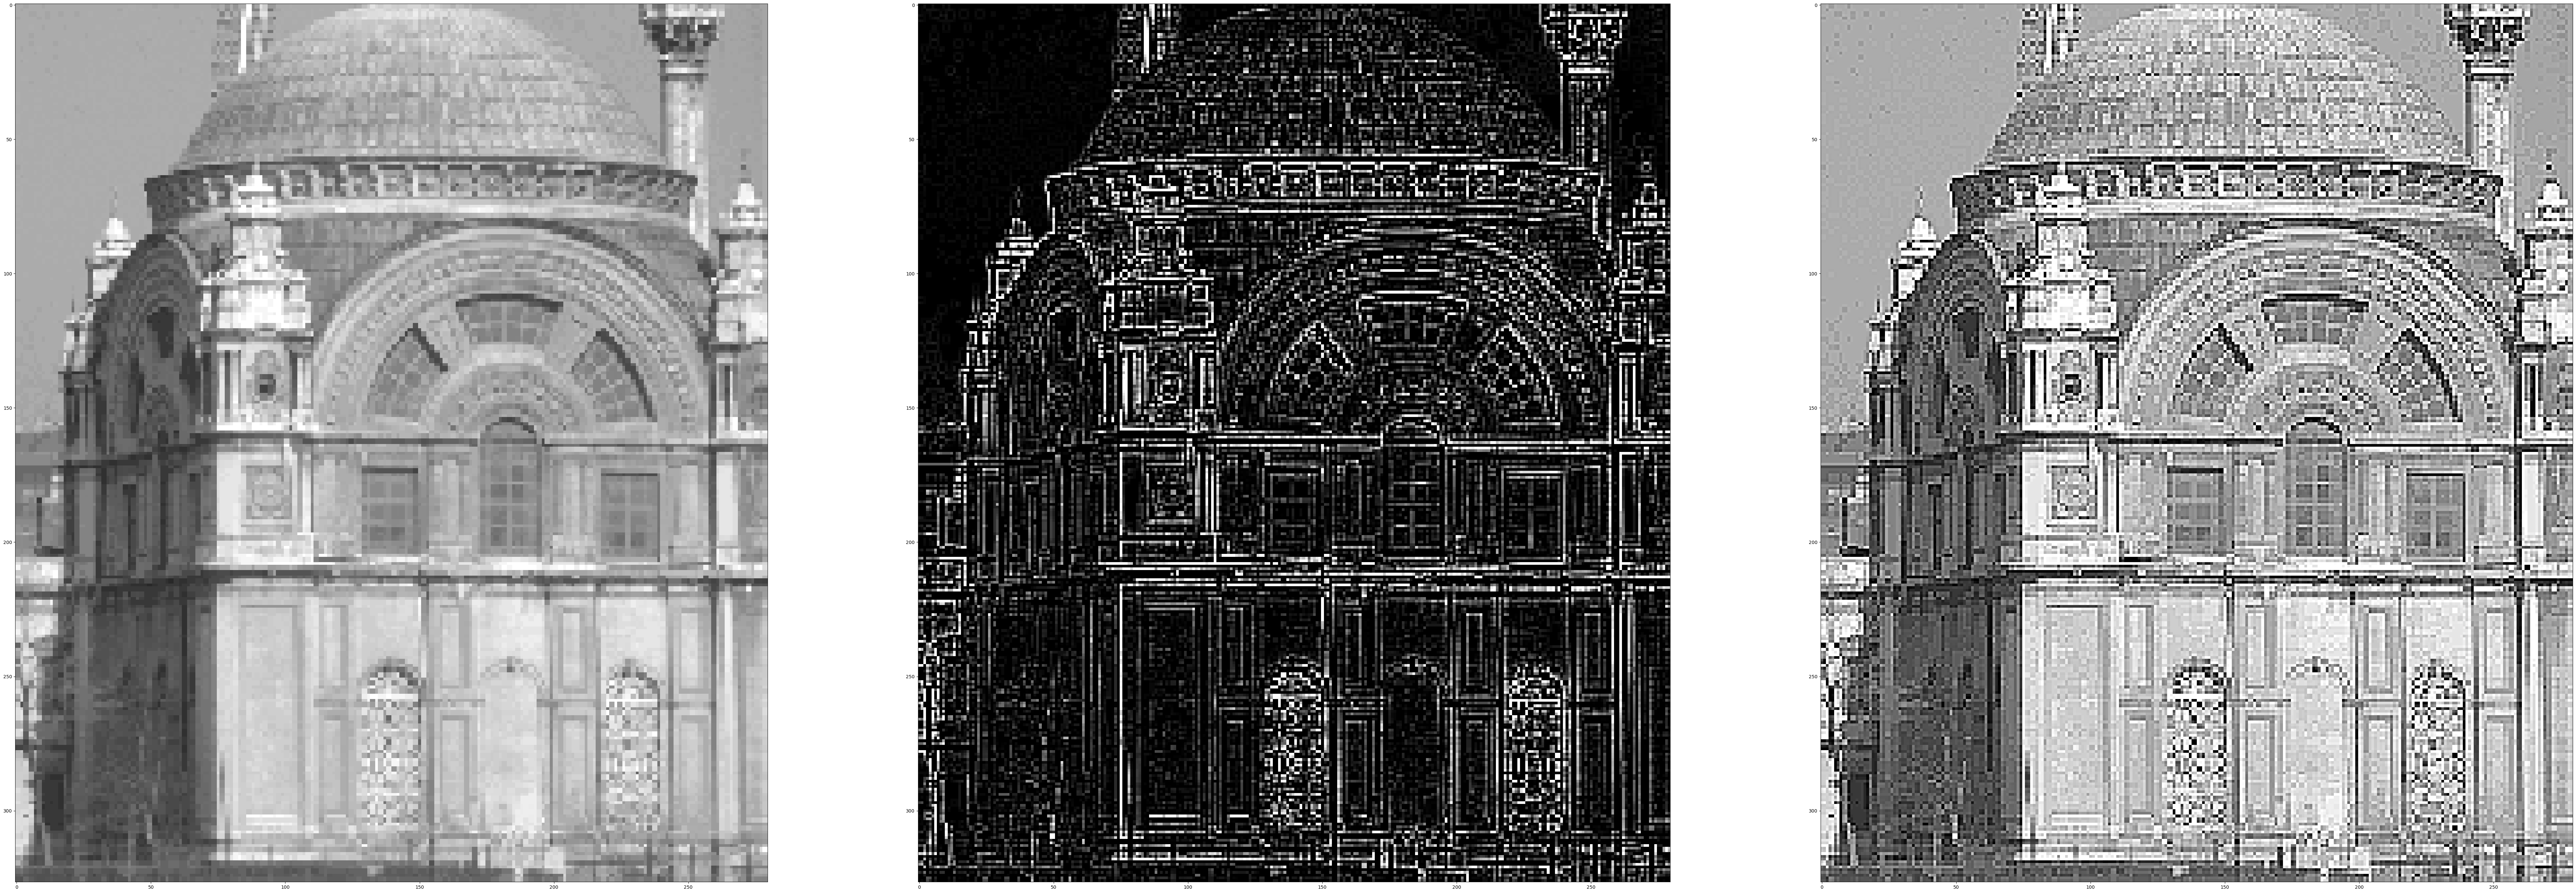

In [53]:
silla = cv.imread("imagenes/estanbul.tif",cv.IMREAD_GRAYSCALE)

filter_sum0 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
filter_sum1 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

silla_0 = cv.filter2D(silla,-1,filter_sum0)
silla_1 = cv.filter2D(silla,-1,filter_sum1)

fig,ax = plt.subplots(1,3,figsize=(100,100))
ax[0].imshow(silla,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(silla_0,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(silla_1,cmap="gray",vmin=0,vmax=255)
plt.show()

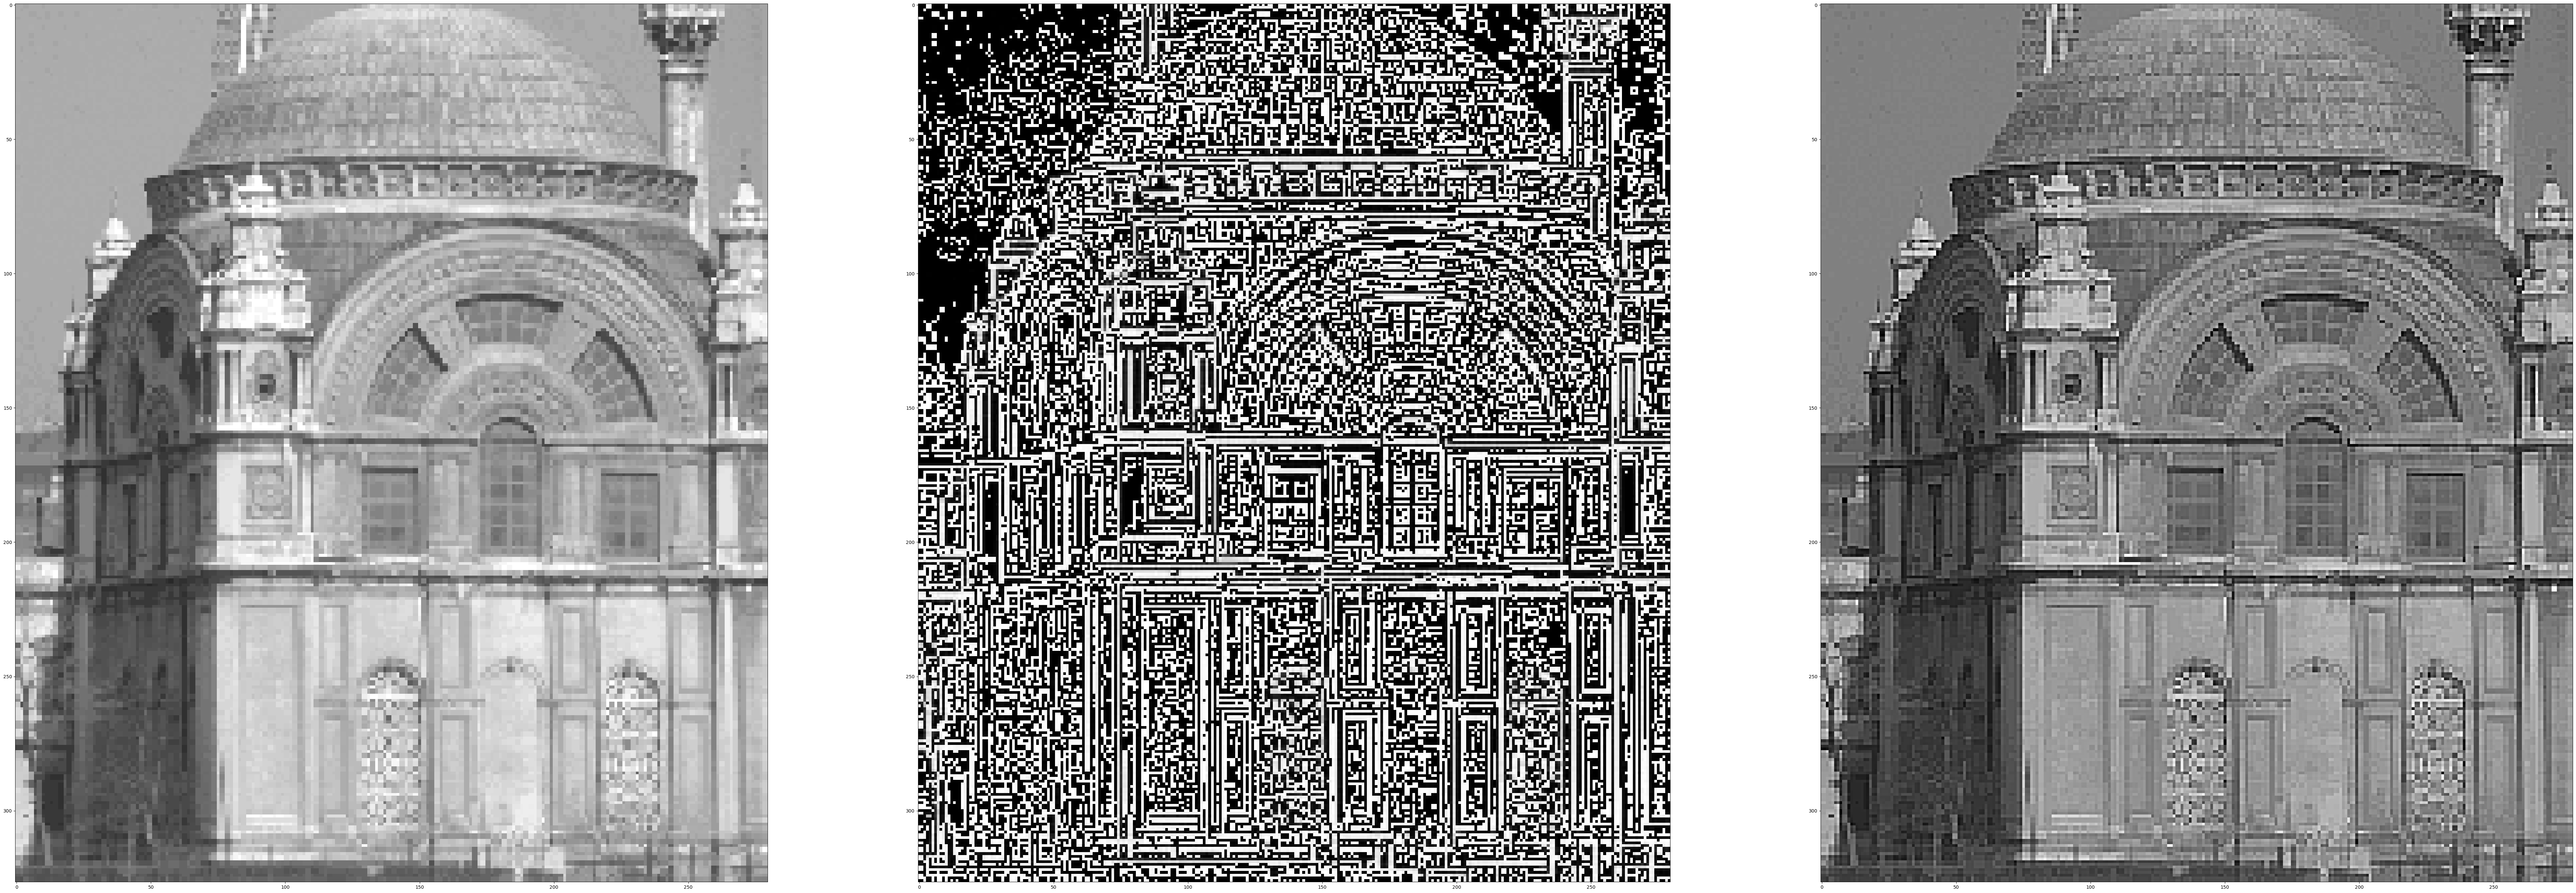

In [30]:
#3 Filtros de acentuado
estanbul = cv.imread("imagenes/estanbul.tif",cv.IMREAD_GRAYSCALE)
estanbul_pb = cv.boxFilter(estanbul,-1,(3,3))
A=1.75
estanbul_acentuada = estanbul - estanbul_pb
estanbul_hb = A*estanbul - estanbul_pb

fig,ax = plt.subplots(1,3,figsize=(100,100))
ax[0].imshow(estanbul,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(estanbul_acentuada,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(estanbul_hb,cmap="gray",vmin=0,vmax=255)
plt.show()

# ejercicio 4

In [67]:
def trans_log():
    c=255/np.log10(1+255)
    r = np.arange(256)
    s = c*np.log10(1+r)
    return s

def trans_potencia(gamma):
    r = np.arange(256)/255
    s = pow(r,gamma)
    return s*255

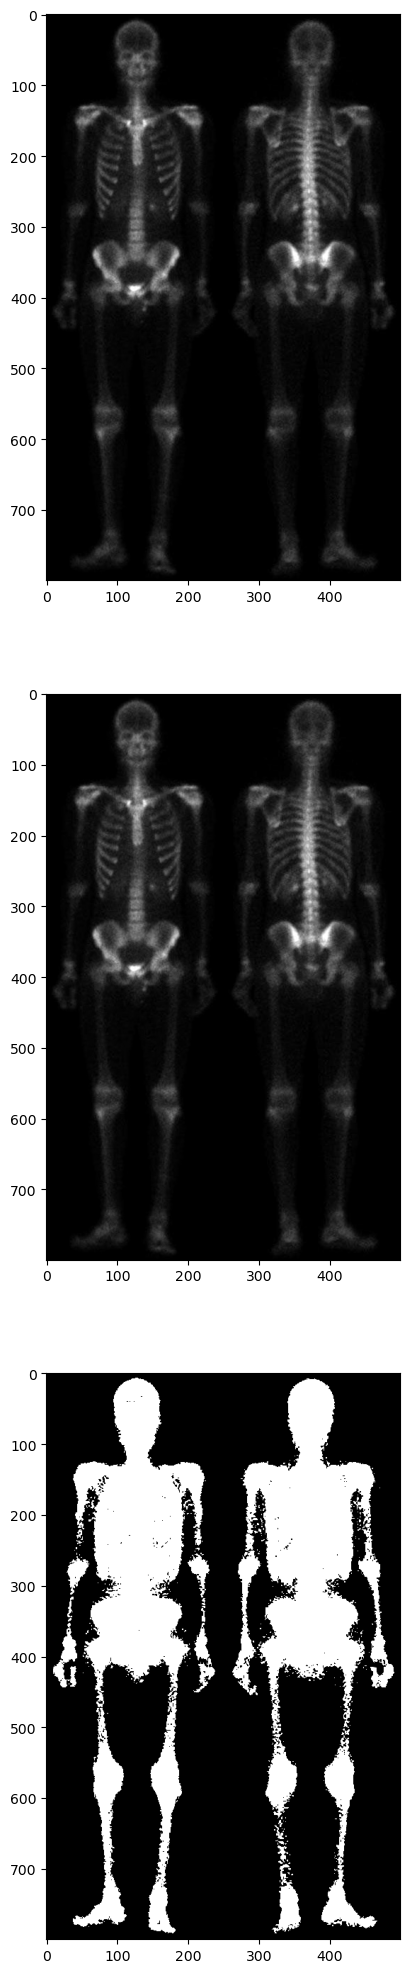

In [87]:
esqueleto = cv.imread("imagenes/esqueleto.tif",cv.IMREAD_GRAYSCALE)
mapeo_potencia = trans_potencia(3.5)
mapeo_log = trans_log()


esqueleto_log = esqueleto.copy()
esqueleto_pot = esqueleto.copy()
esqueleto_pot[:] = mapeo_potencia[esqueleto_log[:]]

filter_sum0 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
filter_sum1 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

esqueleto_pb = cv.medianBlur(esqueleto_pot,3)
esqueleto_1 = cv.filter2D(esqueleto_pot,-1,filter_sum1)

esqueleto_bi = cv.threshold(esqueleto,25,255,cv.THRESH_BINARY)[1]
esqueleto_bi2 = cv.threshold(esqueleto,15,255,cv.THRESH_BINARY)[1]

fig,ax = plt.subplots(3,figsize=(25,25))
ax[0].imshow(esqueleto,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(esqueleto_log,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(esqueleto_bi2,cmap="gray",vmin=0,vmax=255)
plt.show()

entre el median blur y el bilateral voy a notar algo diferente??


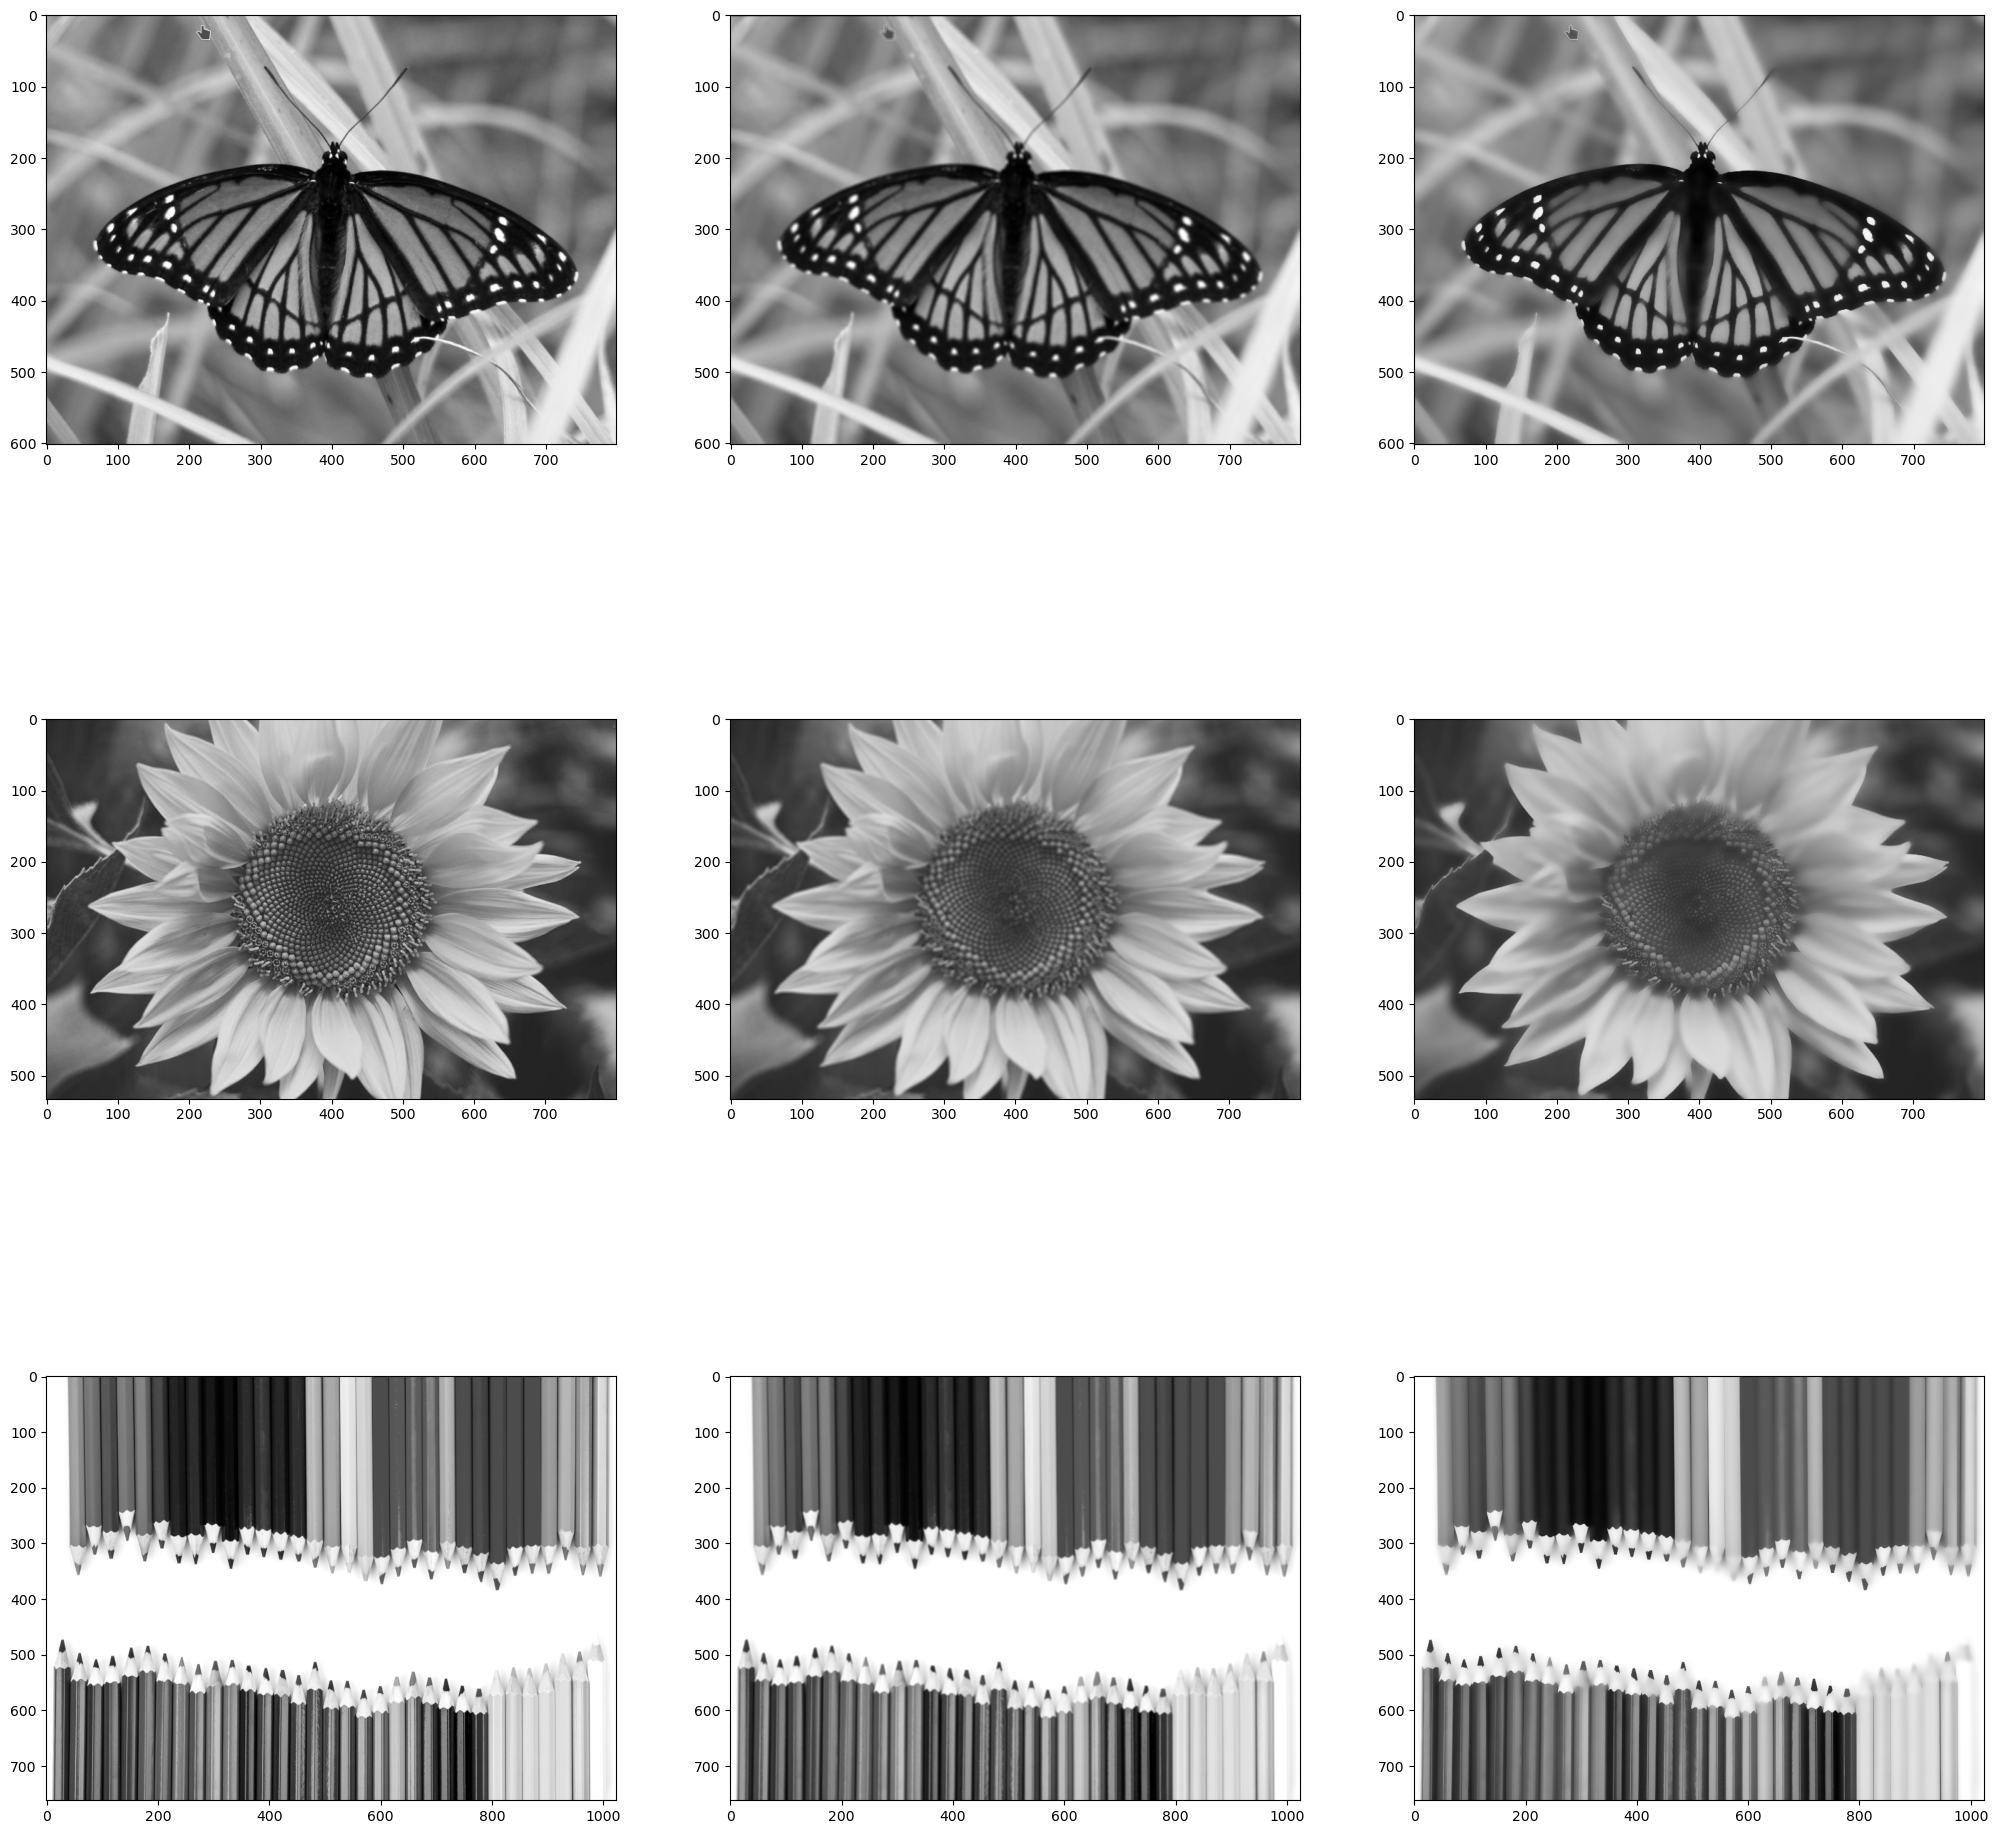

In [99]:
mariposa = cv.imread("imagenes/mariposa02.png",cv.IMREAD_GRAYSCALE)
flores = cv.imread("imagenes/flores02.jpg",cv.IMREAD_GRAYSCALE)
lapices = cv.imread("imagenes/lapices02.jpg",cv.IMREAD_GRAYSCALE)

mariposa_median = cv.GaussianBlur(mariposa,(5,5),80)
flores_median = cv.GaussianBlur(flores,(5,5),80)
lapices_median = cv.GaussianBlur(lapices,(5,5),0)

mariposa_bilateral = cv.bilateralFilter(mariposa,15,50,50)
flores_bilateral = cv.bilateralFilter(flores,15,50,50)
lapices_bilateral = cv.bilateralFilter(lapices,15,50,50)

fig,ax = plt.subplots(3,3,figsize=(25,25))
ax[0,0].imshow(mariposa,cmap="gray",vmin=0,vmax=255)
ax[1,0].imshow(flores,cmap="gray",vmin=0,vmax=255)
ax[2,0].imshow(lapices,cmap="gray",vmin=0,vmax=255)

ax[0,1].imshow(mariposa_median,cmap="gray",vmin=0,vmax=255)
ax[1,1].imshow(flores_median,cmap="gray",vmin=0,vmax=255)
ax[2,1].imshow(lapices_median,cmap="gray",vmin=0,vmax=255)

ax[0,2].imshow(mariposa_bilateral,cmap="gray",vmin=0,vmax=255)
ax[1,2].imshow(flores_bilateral,cmap="gray",vmin=0,vmax=255)
ax[2,2].imshow(lapices_bilateral,cmap="gray",vmin=0,vmax=255)
plt.show()